In [2]:
"""
transactions.ipynb

Goal with this notebook is to extend the analysis of blocks.ipynb
to transactions within each block for more detail.
"""

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import typing as tp

from ape import accounts, chain, Contract, networks
from pathlib import Path
from scipy import stats

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# look at the current block
current_block = chain.blocks[-1]
current_block

Block(num_transactions=306, hash=HexBytes('0x4f1fd548106380bd71fdddf61bd308b00589ebd2b833aeebdb69d03c867c47b6'), number=15832312, parent_hash=HexBytes('0xb537bca911b1cef327e397cac98f1b5b0f611747262af092609b00f17ef8283b'), size=122343, timestamp=1666788083, gas_limit=30000000, gas_used=29991454, base_fee=13692337804, difficulty=0, total_difficulty=58750003716598352816469)

In [5]:
# some relevant numbers
start_block_number = 15338009 # ~ 1 month before merge
merge_block_number = 15537394
current_block_number = current_block.number

In [6]:
# load EL blocks from csv if already queried, else do the query and save in csv
# SEE: blocks.ipynb
def load_blocks(fp: str) -> pd.DataFrame:
    if os.path.exists(fp):
        return pd.read_csv(fp)
    else:
        qb = chain.blocks.query('*', start_block=start_block_number)
        qb.to_csv(fp, index=False)
        return qb

In [7]:
# get blocks over last 2 months (since mid Aug to mid October)
# NOTE: query takes around ~15h if not from csv
%time qb = load_blocks('./data/blocks.csv')

CPU times: user 899 ms, sys: 76.8 ms, total: 975 ms
Wall time: 1e+03 ms


In [8]:
qb

,num_transactions,hash,number,parent_hash,size,timestamp,gas_limit,gas_used,base_fee,difficulty,total_difficulty
0,97,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009,b'm\xb0\x02|\xa9}\x84\xa3\xdd\xc1\x84\xb6\xe4\...,39308,1660456780,30000000,9954560,8122412901,12045723921070914,56321843715293942409414
1,305,b'\xdb\x91:\xfc8Qk\xc1c\x82\xe2\xdbA\xe9b#R\xe...,15338010,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",99210,1660456787,30000000,22464133,7780903344,12051743061157721,56321855767037003567135
2,51,b'\xb0\x0c2\x7f$\xc0\xec$i\xbf\xd9\xcb\x13\x0c...,15338011,b'\xdb\x91:\xfc8Qk\xc1c\x82\xe2\xdbA\xe9b#R\xe...,13806,1660456811,30000000,3781159,8264884155,12045995859944613,56321867813032863511748
3,24,"b""0\xbc\xf0\xa6\x89\xf1w\x1d\x9d\x05\x1c\xc8\x...",15338012,b'\xb0\x0c2\x7f$\xc0\xec$i\xbf\xd9\xcb\x13\x0c...,7824,1660456814,29970705,1551283,7492197312,12057896966730061,56321879870929830241809
4,63,b'`/\xd0\xe0\x7fvc>\x94\xf2\xd1\xca\xbf\x11\x9...,15338013,"b""0\xbc\xf0\xa6\x89\xf1w\x1d\x9d\x05\x1c\xc8\x...",16003,1660456819,29941438,3174533,6652621642,12063922050686819,56321891934851880928628
...,...,...,...,...,...,...,...,...,...,...,...
416045,189,b'\xecP\xf7g\x08\xc2\x19\x12_\x0c\xd8X\x92\x9b...,15754054,b'\x12Y[\x91y.\xb8\xcf\xd7\xca\xb5\x81\x87\x82...,82178,1665843383,30000000,18028304,14001417244,0,58750003716598352816469
416046,253,b'n\xf2R{ \xa9t\xabUD\xbc\x8e\x04B\x87\xb3\t\x...,15754055,b'\xecP\xf7g\x08\xc2\x19\x12_\x0c\xd8X\x92\x9b...,159816,1665843395,30000000,29936690,14354755142,0,58750003716598352816469
416047,137,b'\xb7\x06\xba9s\x7f>p\xd1\xa3\x16\xb0)Y\n\xd4...,15754056,b'n\xf2R{ \xa9t\xabUD\xbc\x8e\x04B\x87\xb3\t\x...,71368,1665843407,30000000,14425421,16141526205,0,58750003716598352816469
416048,117,b'\x86\xd9n\xfb+\x9e\n\xbc\xb3\x99\x155@\xbb\x...,15754057,b'\xb7\x06\xba9s\x7f>p\xd1\xa3\x16\xb0)Y\n\xd4...,56671,1665843419,30000000,11198548,16064238022,0,58750003716598352816469


In [9]:
from functools import partial
from hexbytes import HexBytes
from typing import List

from ape.api.providers import BlockAPI, TransactionAPI
from ape.api.query import BlockTransactionQuery, extract_fields, validate_and_expand_columns

# for each block in blocks query, query for transactions
def transaction_container_query(block, *columns: List[str]) -> pd.DataFrame:
    """
    Implements what could be a transaction "container" query analogous
    to https://github.com/ApeWorX/ape/blob/main/src/ape/managers/chain.py#L94
    but for transactions.
    """
    # perform BlockTransactionQuery
    # SEE: https://github.com/ApeWorX/ape/blob/main/src/ape/api/providers.py#L92
    query = BlockTransactionQuery(columns=columns, block_id=int(block.number))
    transactions = chain.query_manager.query(query) # use chain here so block can be row in pd.DataFrame
    
    # put into a dataframe and return
    columns = validate_and_expand_columns(columns, TransactionAPI) # NOTE: this might not include all fields we want!
    transactions = map(partial(extract_fields, columns=columns), transactions)
    df = pd.DataFrame(columns=columns, data=transactions)
    
    # add in columns for block number and block hash then return
    df['block_hash'] = [ block.hash for i in range(len(df)) ]
    df['block_number'] = [ block.number for i in range(len(df)) ]
    return df

In [10]:
# :) works
print('qb.iloc[0]', qb.iloc[0])
transaction_container_query(qb.iloc[0], '*')

qb.iloc[0] num_transactions                                                   97
hash                b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...
number                                                       15338009
parent_hash         b'm\xb0\x02|\xa9}\x84\xa3\xdd\xc1\x84\xb6\xe4\...
size                                                            39308
timestamp                                                  1660456780
gas_limit                                                    30000000
gas_used                                                      9954560
base_fee                                                   8122412901
difficulty                                          12045723921070914
total_difficulty                              56321843715293942409414
Name: 0, dtype: object
INFO: Cache database has not been initialized


,chain_id,receiver,sender,gas_limit,nonce,value,data,type,max_fee,max_priority_fee,required_confirmations,signature,block_hash,block_number
0,1,0x70526cc7a6d6320B44122ea9d2d07670ACcC85A1,0xa00CcE999f4cdde0230360609ed94e3b64b09EC1,290156,24042,0,b'\x00\xc1\xb6\x83\xcc\x10\x03\x0f\x00\x00\x00...,0x02,10282974732,2.500000e+09,2,<TransactionSignature v=0 r=2e7b2dff43593be420...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
1,1,0xdb7A53E6AE058E1Dcf4502341E2ADFA522E2B29F,0x8E17d7A5Eeb39E558021e0B5F75Ad60CF9a1a939,253902,4295,0,"b'\x06\x18\xd8\x03=\xfc\xadj\x00""e\xfc\xf3\x93...",0x00,0,NaN,2,<TransactionSignature v=37 r=0bf26aa00960a2738...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
2,1,0xd5FBDa4C79F38920159fE5f22DF9655FDe292d47,0x541a46FFf74cAEFD2a54B752c48b02Ba9864d51E,21000,191,69925781296602000,b'',0x02,26210890638,2.621089e+10,2,<TransactionSignature v=0 r=de2d14fc2824b99aa6...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
3,1,0xd5FBDa4C79F38920159fE5f22DF9655FDe292d47,0x541a46FFf74cAEFD2a54B752c48b02Ba9864d51E,21000,192,69943042248093000,b'',0x02,25388940567,2.538894e+10,2,<TransactionSignature v=0 r=a93837dc4bb3c0c894...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
4,1,0x1111111254fb6c44bAC0beD2854e76F90643097d,0x0e3Fbeba7c45666F2EcacEE7c60844a9C1844151,460110,73,14540000000000000000,b'|\x02R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x...,0x02,14720610463,7.500000e+09,2,<TransactionSignature v=0 r=754ff55d40bf584814...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,0xb0d47dD82fb8FACb1Bc4bA534a836B545aD97d2B,0x39B984d1D427BD74a7713537A27530d2963B92B2,142195,120,0,b'\xa9\x05\x9c\xbb\x00\x00\x00\x00\x00\x00\x00...,0x02,8703000983,1.000000e+09,2,<TransactionSignature v=1 r=7bde3123c97e5c06c2...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
93,1,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,0x385d94dE0BE5F6d958B8340a8BE6F51c4D53bD87,216907,119,50000000000000000,"b""Z\xe4\x01\xdc\x00\x00\x00\x00\x00\x00\x00\x0...",0x02,8703000983,1.000000e+09,2,<TransactionSignature v=0 r=84dea5997f56e3cb49...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
94,1,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,0xD72276Ef7305Be51C1FdaFCB571B274B55e98526,349912,514,20000000000000000,b'Z\xe4\x01\xdc\x00\x00\x00\x00\x00\x00\x00\x0...,0x02,8703000983,1.000000e+09,2,<TransactionSignature v=1 r=bfc5278e179af89505...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
95,1,0x65c2e54a4c75ff6da7b6B32369c1677250075fb2,0x87619f8e63cD2F339f1EBD5144fD3fE37871c204,177495,0,7514540636130913,b'vI\xb9W\x00\x00\x00\x00\x00\x00\x00\x00\x00\...,0x02,8703000983,1.000000e+09,2,<TransactionSignature v=0 r=5991e716eeec68d5f5...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009


In [11]:
# load EL transactions from csv if already queried, else do the query and save in csv
# TODO: CHUNK LOAD
def load_transactions(fp: str, compression: str, qb: pd.DataFrame, starts_from_head: bool) -> pd.DataFrame:
    # query transactions in each block
    # use iterrows to save transactions to temp csv
    tmp_fp = str(Path(fp).parent / Path('_tmp_' + Path(fp).name))
    is_head = starts_from_head
    for _, b in qb.iterrows():
        qt = transaction_container_query(b, '*')
        
        # append to temp
        # NOTE: qt is of type pd.DataFrame
        qt.to_csv(tmp_fp, mode='a', compression=compression, index=False, header=is_head)
        if is_head:
            is_head = False
        
    # once done iterating, mv temp to output file and load
    os.rename(tmp_fp, fp)
    return pd.read_csv(fp, compression=compression)

In [12]:
# get txs in each block over last 2 months (since mid Aug to mid October)
# TODO: fix/remove that one header that was mistakenly appended
# NOTE: query takes around (a long time) if not from csv
# last_block_appended = 15725628
# %time load_transactions('./data/transactions.csv.gz', 'gzip', qb[qb['number'] > last_block_appended], False)

In [13]:
# TODO: chunk the loading from compressed file so viewing in parts
# look at how many rows there should be in qt
print("num txs in qb (sum):", qb['num_transactions'].sum())

num txs in qb (sum): 69567381


In [14]:
# look at only about ~ 1/5 of that data around the merge?
chunk_size = int(qb['num_transactions'].sum() / 10)
start_row = int(qb['num_transactions'].sum() * 4 / 10)
end_row = int(qb['num_transactions'].sum() * 6 / 10)

print("chunk_size", chunk_size)
print("(start_row, end_row)", (start_row, end_row))

chunk_size 6956738
(start_row, end_row) (27826952, 41740428)


In [15]:
%%capture --no-display
# also, only need columns for gas analysis: ['block_number', 'receiver', 'sender', 'gas_limit', 'type', 'max_fee', 'max_priority_fee']
cols = ['block_number', 'receiver', 'sender', 'gas_limit', 'type', 'max_fee', 'max_priority_fee']

qt = pd.DataFrame(columns=cols)
with pd.read_csv('./data/transactions.csv.gz', compression='gzip', chunksize=chunk_size, usecols=cols) as reader:
    for i, chunk in enumerate(reader):
        if i >= 4 and i < 6:
            print("chunk", chunk)
            qt = pd.concat([qt, chunk])

In [16]:
qt

,block_number,receiver,sender,gas_limit,type,max_fee,max_priority_fee
27826952,15500283,0x59CCf62B862f99B5aEd8857FBAdB7F895f6c59D5,0xF585A4aE338bC165D96E8126e8BBcAcAE725d79E,740000,0x02,2.055775e+10,1.841313e+09
27826953,15500283,0x4D9079Bb4165aeb4084c526a32695dCfd2F77381,0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010,103581,0x02,8.952896e+10,1.800000e+09
27826954,15500283,0x9983D8cDEAf7872501628229d311E2F7Df396aDd,0xcd4A15841a4906fF78D3F2Aa8E55936F1A7Ae4a5,243018,0x02,1.209108e+10,3.000000e+09
27826955,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0xf2D77B80B0Bb3F40a174B1A46FE5Ee8ED48CFEEC,46179,0x02,1.820000e+10,1.660000e+09
27826956,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0x0cCC8254F63Bf740cFcE73D99D11A298cE7FEBa8,46179,0x02,1.820000e+10,1.660000e+09
...,...,...,...,...,...,...,...
41740423,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x9F90A7b2a23a7eF714d1eE0e74002fCb1e2f10df,21000,0x02,2.100000e+10,2.000000e+09
41740424,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x81EF2365124A2b951f2D8B0C3e98c5b294D5dD40,21000,0x02,2.100000e+10,2.000000e+09
41740425,15580183,0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0x1EF2CbC0857938EF6653Fb0a6036328bC82a5FC1,23300,0x02,2.100000e+10,2.000000e+09
41740426,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x36f537939A111995D09d0b856dAd41875B9687Ac,21000,0x02,2.100000e+10,2.000000e+09


In [17]:
%%capture
# convert fees from wei to gwei
qt['max_fee_gwei'] = qt['max_fee'].astype(float) / 1e9
qt['max_priority_fee_gwei'] = qt['max_priority_fee'].astype(float) / 1e9

In [18]:
qt.drop(columns=['max_fee', 'max_priority_fee'], inplace=True)

In [19]:
%%capture
# convert fees from wei to gwei
qb['base_fee_gwei'] = qb['base_fee'].astype(float) / 1e9

In [20]:
qb.drop(columns=['base_fee'], inplace=True)

In [21]:
# join qb.timestamp, qb.base_fee into qt
qt = qt.join(qb.filter(['number', 'timestamp', 'base_fee_gwei']).rename(columns={"number": "block_number"}).set_index('block_number'), on='block_number')
qt

,block_number,receiver,sender,gas_limit,type,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei
27826952,15500283,0x59CCf62B862f99B5aEd8857FBAdB7F895f6c59D5,0xF585A4aE338bC165D96E8126e8BBcAcAE725d79E,740000,0x02,20.557748,1.841313,1662691234,10.362594
27826953,15500283,0x4D9079Bb4165aeb4084c526a32695dCfd2F77381,0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010,103581,0x02,89.528961,1.800000,1662691234,10.362594
27826954,15500283,0x9983D8cDEAf7872501628229d311E2F7Df396aDd,0xcd4A15841a4906fF78D3F2Aa8E55936F1A7Ae4a5,243018,0x02,12.091082,3.000000,1662691234,10.362594
27826955,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0xf2D77B80B0Bb3F40a174B1A46FE5Ee8ED48CFEEC,46179,0x02,18.200000,1.660000,1662691234,10.362594
27826956,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0x0cCC8254F63Bf740cFcE73D99D11A298cE7FEBa8,46179,0x02,18.200000,1.660000,1662691234,10.362594
...,...,...,...,...,...,...,...,...,...
41740423,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x9F90A7b2a23a7eF714d1eE0e74002fCb1e2f10df,21000,0x02,21.000000,2.000000,1663743659,8.255909
41740424,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x81EF2365124A2b951f2D8B0C3e98c5b294D5dD40,21000,0x02,21.000000,2.000000,1663743659,8.255909
41740425,15580183,0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0x1EF2CbC0857938EF6653Fb0a6036328bC82a5FC1,23300,0x02,21.000000,2.000000,1663743659,8.255909
41740426,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x36f537939A111995D09d0b856dAd41875B9687Ac,21000,0x02,21.000000,2.000000,1663743659,8.255909


In [22]:
# calculate effective gas price paid per tx
#  ... `priority_fee_per_gas = min(transaction.max_priority_fee_per_gas, transaction.max_fee_per_gas - block.base_fee_per_gas)`
#  ... `effective_gas_price = priority_fee_per_gas + block.base_fee_per_gas`
#  ... `fee_paid = gas_used * effective_gas_price`
# SEE: https://eips.ethereum.org/EIPS/eip-1559#Specification

In [23]:
qt['max_fee_less_base_gwei'] = qt['max_fee_gwei'] - qt['base_fee_gwei']
qt['priority_fee_gwei'] = np.minimum(qt['max_priority_fee_gwei'], qt['max_fee_less_base_gwei'])
qt['effective_gas_price_gwei'] = qt['priority_fee_gwei'] + qt['base_fee_gwei']

In [24]:
# have the data we need now ...
qt

,block_number,receiver,sender,gas_limit,type,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,max_fee_less_base_gwei,priority_fee_gwei,effective_gas_price_gwei
27826952,15500283,0x59CCf62B862f99B5aEd8857FBAdB7F895f6c59D5,0xF585A4aE338bC165D96E8126e8BBcAcAE725d79E,740000,0x02,20.557748,1.841313,1662691234,10.362594,10.195154,1.841313,12.203908
27826953,15500283,0x4D9079Bb4165aeb4084c526a32695dCfd2F77381,0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010,103581,0x02,89.528961,1.800000,1662691234,10.362594,79.166367,1.800000,12.162594
27826954,15500283,0x9983D8cDEAf7872501628229d311E2F7Df396aDd,0xcd4A15841a4906fF78D3F2Aa8E55936F1A7Ae4a5,243018,0x02,12.091082,3.000000,1662691234,10.362594,1.728488,1.728488,12.091082
27826955,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0xf2D77B80B0Bb3F40a174B1A46FE5Ee8ED48CFEEC,46179,0x02,18.200000,1.660000,1662691234,10.362594,7.837406,1.660000,12.022594
27826956,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0x0cCC8254F63Bf740cFcE73D99D11A298cE7FEBa8,46179,0x02,18.200000,1.660000,1662691234,10.362594,7.837406,1.660000,12.022594
...,...,...,...,...,...,...,...,...,...,...,...,...
41740423,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x9F90A7b2a23a7eF714d1eE0e74002fCb1e2f10df,21000,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909
41740424,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x81EF2365124A2b951f2D8B0C3e98c5b294D5dD40,21000,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909
41740425,15580183,0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0x1EF2CbC0857938EF6653Fb0a6036328bC82a5FC1,23300,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909
41740426,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x36f537939A111995D09d0b856dAd41875B9687Ac,21000,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909


In [25]:
# to start, look at proportion of txs that are EIP1559 in filtered dataset ...
qt_grouped_by_type = qt.groupby(by='block_number').agg({'type': lambda x: x[x == "0x02"].count() / x.count() })

In [26]:
qt_grouped_by_type['number'] = qt_grouped_by_type.index
qt_grouped_by_type

,type,number
block_number,,
15500283,0.960227,15500283
15500285,0.739003,15500285
15500287,0.925501,15500287
15500288,0.836066,15500288
15500289,0.750000,15500289
...,...,...
15580179,0.958333,15580179
15580180,0.901468,15580180
15580181,0.889474,15580181


<AxesSubplot: xlabel='number', ylabel='type'>

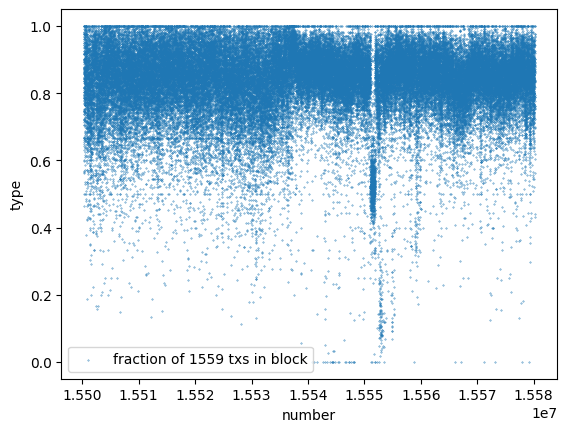

In [27]:
qt_grouped_by_type.plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block', s=0.1)

<AxesSubplot: xlabel='number', ylabel='type'>

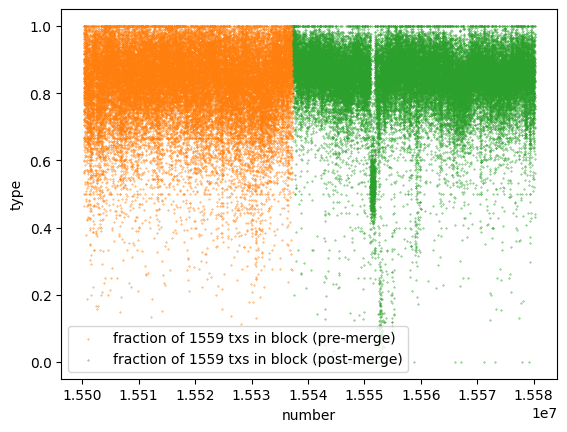

In [28]:
# change color to distinguish b/w pre vs post-merge
#  ... Q: what's that drop off in EIP1559 fraction around block_number=1.555 * 1e7?
#  ... TODO: look at distribution of EIP1559 fraction. Seems less concentrated around 1 post-merge?
ax = qt_grouped_by_type[qt_grouped_by_type['number'] < merge_block_number].plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block (pre-merge)', s=0.1, color='C1')
qt_grouped_by_type[qt_grouped_by_type['number'] >= merge_block_number].plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block (post-merge)', s=0.1, color='C2', ax=ax)

<AxesSubplot: xlabel='number', ylabel='type'>

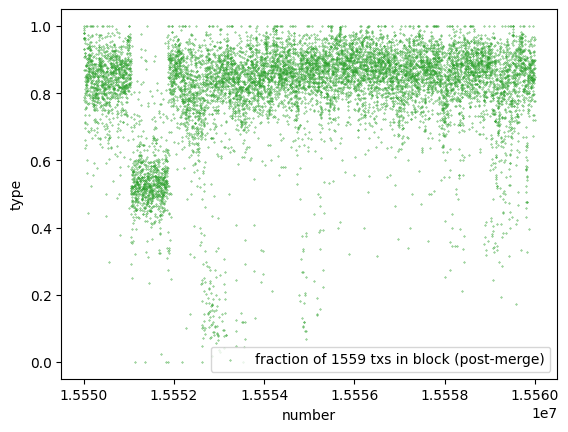

In [29]:
# zoom in post-merge around
# ... TODO: not entirely sure what's goin on there. will come back to it after distribution of EIP1559 and gas data
qt_grouped_by_type[(qt_grouped_by_type['number'] >= 1.555*1e7) & (qt_grouped_by_type['number'] < 1.556*1e7)].plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block (post-merge)', s=0.1, color='C2')

<AxesSubplot: ylabel='Frequency'>

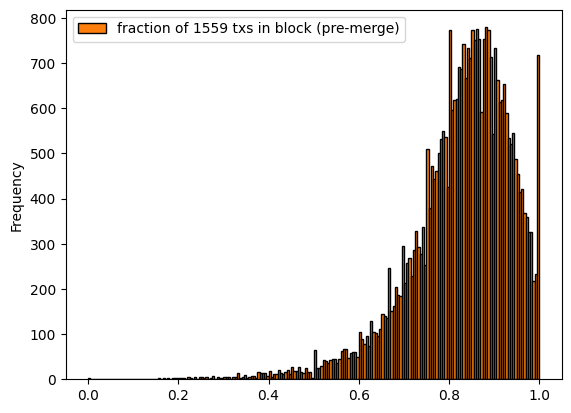

In [77]:
# distribution of 1559 txs in a block
#  ... pre-merge
qt_grouped_by_type[qt_grouped_by_type['number'] < merge_block_number].plot(y='type', kind='hist', bins=200, color='C1', edgecolor='k', label='fraction of 1559 txs in block (pre-merge)')

<AxesSubplot: ylabel='Frequency'>

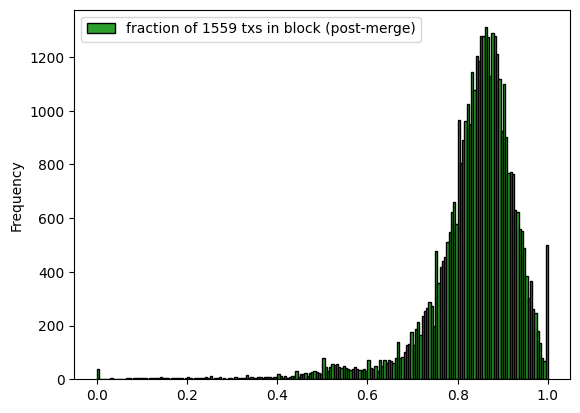

In [78]:
# distribution of 1559 txs ina block
#  ... post-merge
#  ... NOTE: noticeable reduction of 100% 1559 txs in blocks post-merge. why?
qt_grouped_by_type[qt_grouped_by_type['number'] >= merge_block_number].plot(y='type', kind='hist', bins=200, color='C2', edgecolor='k', label='fraction of 1559 txs in block (post-merge)')

In [32]:
# Look at gas in txs: priority fee, max fee
#  ... Q: is it cheaper for users to get tx included?
#  ... Q: does merge reduce tx fees post merge due to lack of variability?

# priority fee = tip needed to include for tx to go through (on top of base fee)
# max fee = max user was willing to pay

# so interesting to look at:
#  ... [ ] priority fee changes = how much more/less need to pay to miners/validators for tx to be included
#  ... [ ] max fee changes = how much more/less users are willing to pay for tx to possibly be included

In [118]:
%%capture --no-display
# start with priority fee
#  ... take averages within block
qt_group_by_block_avgs = qt.groupby(by='block_number').mean()

In [34]:
qt_group_by_block_avgs['number'] = qt_group_by_block_avgs.index

In [35]:
qt_group_by_block_avgs

,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,max_fee_less_base_gwei,priority_fee_gwei,effective_gas_price_gwei,number
block_number,,,,,,,,
15500283,17.558501,1.624996,1.662691e+09,10.362594,7.195907,1.494838,11.857432,15500283
15500285,49.576833,8.814100,1.662691e+09,10.199984,39.376849,8.243863,18.443847,15500285
15500287,31.544860,1.901472,1.662691e+09,10.039201,21.505659,1.745195,11.784397,15500287
15500288,72.567823,1.816686,1.662691e+09,11.292988,61.274834,1.816686,13.109674,15500288
15500289,13.964421,1.453036,1.662691e+09,10.315720,3.648702,1.453036,11.768755,15500289
...,...,...,...,...,...,...,...,...
15580179,36.633434,2.390792,1.663744e+09,9.128519,27.504916,2.390792,11.519310,15580179
15580180,56.819752,3.531390,1.663744e+09,8.164188,48.655564,3.431042,11.595230,15580180
15580181,47.852809,1.908044,1.663744e+09,9.183709,38.669101,1.747920,10.931628,15580181


<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

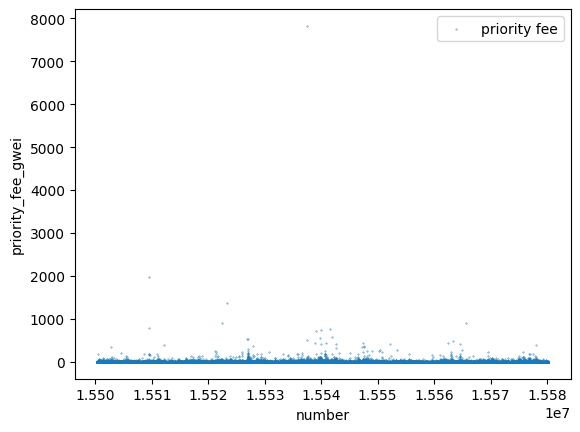

In [36]:
qt_group_by_block_avgs.plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee in gwei', s=0.1)

<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

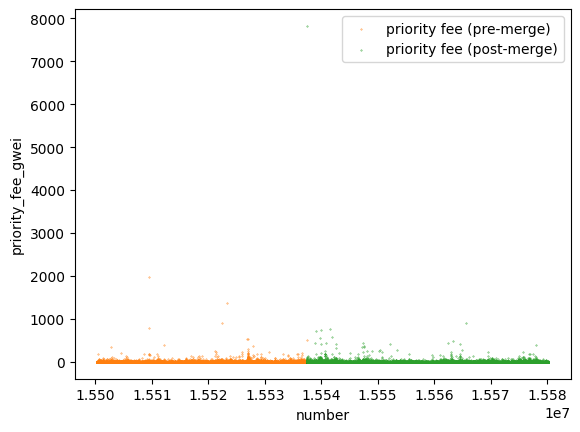

In [37]:
ax = qt_group_by_block_avgs[qt_group_by_block_avgs["number"] < merge_block_number].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee in gwei (pre-merge)', s=0.1, color='C1')
qt_group_by_block_avgs[qt_group_by_block_avgs["number"] >= merge_block_number].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee in gwei (post-merge)', s=0.1, color='C2', ax=ax)

<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

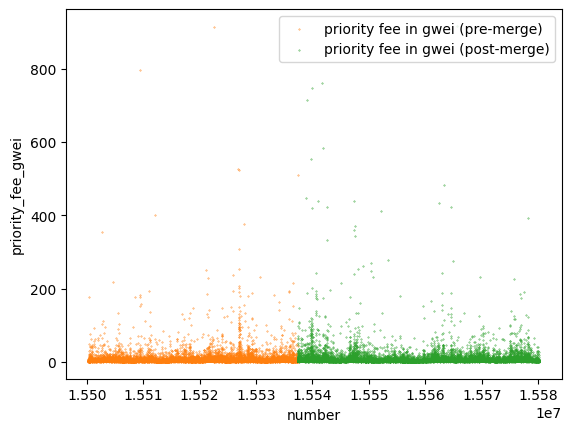

In [110]:
# ignore the extreme outliers
#  ... structure of priority fee market looks pretty similar pre v.s. post-merge
fee_filter_max = 1000  # should use e.g. 99% as cutoff
ax = qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] < merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee in gwei (pre-merge)', s=0.1, color='C1')
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] >= merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee in gwei (post-merge)', s=0.1, color='C2', ax=ax)

<AxesSubplot: ylabel='Frequency'>

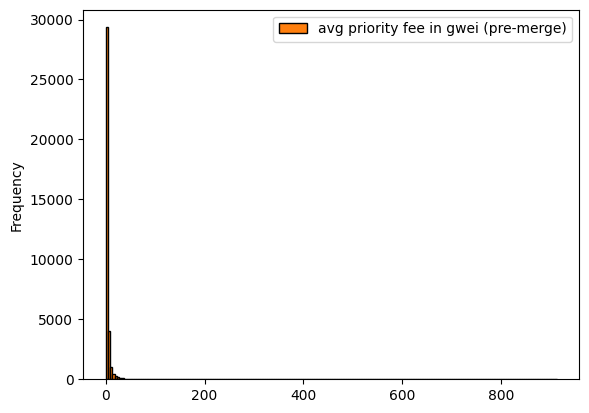

In [94]:
# look at the distribution of avg priority fees (ignoring extreme outliers)
#  ... pre-merge
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] < merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C1', edgecolor='k', label='avg priority fee in gwei (pre-merge)')

<AxesSubplot: ylabel='Frequency'>

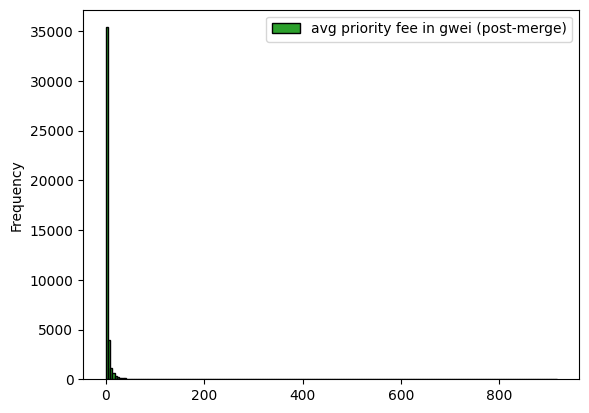

In [95]:
# look at the distribution of avg priority fees (ignoring extreme outliers)
#  ... post-merge
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] >= merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C2', edgecolor='k', label='avg priority fee in gwei (post-merge)')

<AxesSubplot: ylabel='Frequency'>

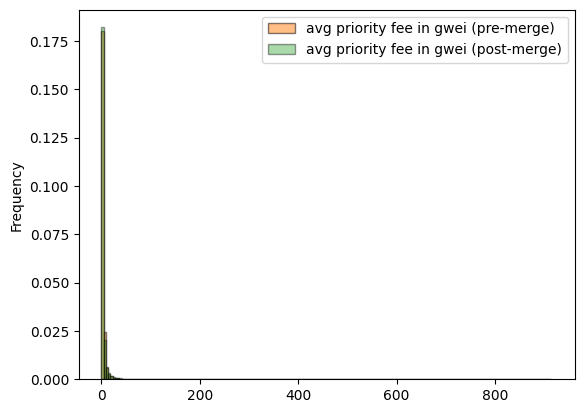

In [96]:
# plot histogram of priority fee (ignoring extreme outliers)
#  ... pre vs post merge (one on top of other)
#  ... close to same distr
ax = qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] < merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C1', edgecolor='k', alpha=0.5, density=True, label='avg priority fee in gwei (pre-merge)')
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] >= merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C2', edgecolor='k', alpha=0.4, density=True, label='avg priority fee in gwei (post-merge)', ax=ax)

In [ ]:
# TODO: levy fit again ...

In [ ]:
# TODO: stacked chart of base fee and avg priority fee

<AxesSubplot: xlabel='number'>

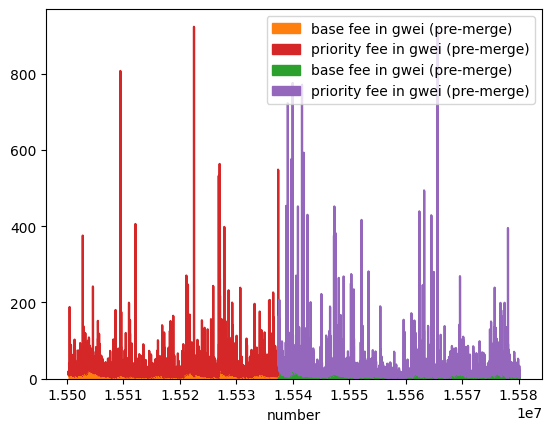

In [108]:
# priority fees can be insane
ax = qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] < merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(x='number', y=['base_fee_gwei', 'priority_fee_gwei'], kind='area', color=['C1', 'C3'], label=['base fee in gwei (pre-merge)', 'priority fee in gwei (pre-merge)'])
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] >= merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(x='number', y=['base_fee_gwei', 'priority_fee_gwei'], kind='area', color=['C2', 'C4'], label=['base fee in gwei (pre-merge)', 'priority fee in gwei (pre-merge)'], ax=ax)

<AxesSubplot: xlabel='number'>

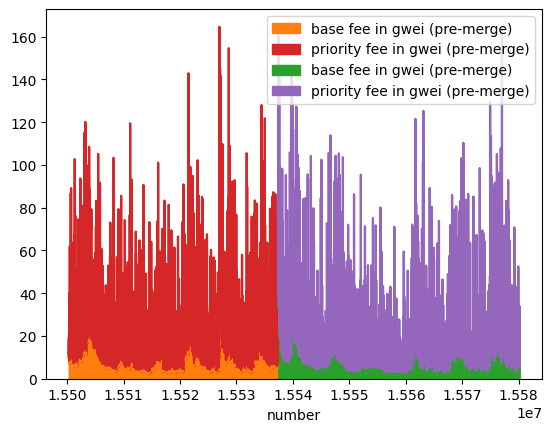

In [111]:
# look with stricter filter
ax = qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] < merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max/10)].plot(x='number', y=['base_fee_gwei', 'priority_fee_gwei'], kind='area', color=['C1', 'C3'], label=['base fee in gwei (pre-merge)', 'priority fee in gwei (pre-merge)'])
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] >= merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max/10)].plot(x='number', y=['base_fee_gwei', 'priority_fee_gwei'], kind='area', color=['C2', 'C4'], label=['base fee in gwei (pre-merge)', 'priority fee in gwei (pre-merge)'], ax=ax)

<AxesSubplot: xlabel='number'>

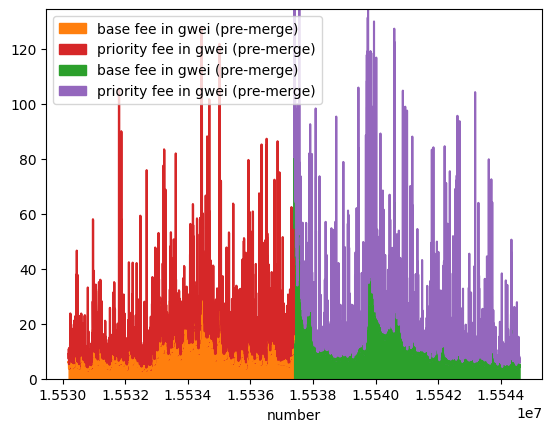

In [113]:
# look close to merge block
ax = qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] < merge_block_number) & (qt_group_by_block_avgs["number"] >= merge_block_number - 86400 // 12) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max/10)].plot(x='number', y=['base_fee_gwei', 'priority_fee_gwei'], kind='area', color=['C1', 'C3'], label=['base fee in gwei (pre-merge)', 'priority fee in gwei (pre-merge)'])
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] >= merge_block_number) & (qt_group_by_block_avgs["number"] <= merge_block_number + 86400 // 12) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max/10)].plot(x='number', y=['base_fee_gwei', 'priority_fee_gwei'], kind='area', color=['C2', 'C4'], label=['base fee in gwei (pre-merge)', 'priority fee in gwei (pre-merge)'], ax=ax)

In [114]:
# base fee spiked immediately post merge?

In [115]:
qt

,block_number,receiver,sender,gas_limit,type,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,max_fee_less_base_gwei,priority_fee_gwei,effective_gas_price_gwei
27826952,15500283,0x59CCf62B862f99B5aEd8857FBAdB7F895f6c59D5,0xF585A4aE338bC165D96E8126e8BBcAcAE725d79E,740000,0x02,20.557748,1.841313,1662691234,10.362594,10.195154,1.841313,12.203908
27826953,15500283,0x4D9079Bb4165aeb4084c526a32695dCfd2F77381,0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010,103581,0x02,89.528961,1.800000,1662691234,10.362594,79.166367,1.800000,12.162594
27826954,15500283,0x9983D8cDEAf7872501628229d311E2F7Df396aDd,0xcd4A15841a4906fF78D3F2Aa8E55936F1A7Ae4a5,243018,0x02,12.091082,3.000000,1662691234,10.362594,1.728488,1.728488,12.091082
27826955,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0xf2D77B80B0Bb3F40a174B1A46FE5Ee8ED48CFEEC,46179,0x02,18.200000,1.660000,1662691234,10.362594,7.837406,1.660000,12.022594
27826956,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0x0cCC8254F63Bf740cFcE73D99D11A298cE7FEBa8,46179,0x02,18.200000,1.660000,1662691234,10.362594,7.837406,1.660000,12.022594
...,...,...,...,...,...,...,...,...,...,...,...,...
41740423,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x9F90A7b2a23a7eF714d1eE0e74002fCb1e2f10df,21000,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909
41740424,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x81EF2365124A2b951f2D8B0C3e98c5b294D5dD40,21000,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909
41740425,15580183,0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0x1EF2CbC0857938EF6653Fb0a6036328bC82a5FC1,23300,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909
41740426,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x36f537939A111995D09d0b856dAd41875B9687Ac,21000,0x02,21.000000,2.000000,1663743659,8.255909,12.744091,2.000000,10.255909


In [206]:
%%capture --no-display
# look at the *minimum* priority fee paid within blocks (wishlist)
# start with priority fee
#  ... take min within block
qt_group_by_block_mins = qt.groupby(by='block_number').min()
qt_group_by_block_mins = qt_group_by_block_mins[~qt_group_by_block_mins['priority_fee_gwei'].isna()]

In [208]:
%%capture --no-display
qt_group_by_block_mins['number'] = qt_group_by_block_mins.index

In [209]:
qt_group_by_block_mins

,sender,gas_limit,type,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,max_fee_less_base_gwei,priority_fee_gwei,effective_gas_price_gwei,number
block_number,,,,,,,,,,,
15500283,0x007104F3e2B65B35e0e525612c0C1cb435262AC7,21000,0x00,0.0,1.000000,1662691234,10.362594,-10.362594,1.000000,11.362594,15500283
15500285,0x000F422887eA7d370FF31173FD3B46c8F66A5B1c,21000,0x00,0.0,0.000000,1662691262,10.199984,-10.199984,0.000000,10.199984,15500285
15500287,0x00192Fb10dF37c9FB26829eb2CC623cd1BF599E8,21000,0x00,0.0,0.000000,1662691317,10.039201,-10.039201,0.000000,10.039201,15500287
15500288,0x26b642458017cf2E661F517a09C54aA505f9273f,21000,0x00,0.0,1.000000,1662691324,11.292988,-11.292988,1.000000,12.292988,15500288
15500289,0x031947dA42998417DE14B69dBa631801144b2586,21000,0x00,0.0,0.000000,1662691331,10.315720,-10.315720,0.000000,10.315720,15500289
...,...,...,...,...,...,...,...,...,...,...,...
15580179,0x063B4788B86397893434b7D3fc84972a917bF5bE,39617,0x00,0.0,0.988205,1663743611,9.128519,-9.128519,0.988205,10.116724,15580179
15580180,0x002e1798Bff1EA5bcD703133eb61706070080c19,21000,0x00,0.0,0.000000,1663743623,8.164188,-8.164188,0.000000,8.164188,15580180
15580181,0x011e2747F5E393E67CE0372cB9cfBd0B9a4C8F12,21000,0x00,0.0,0.156864,1663743635,9.183709,-9.183709,0.066291,9.250000,15580181


<AxesSubplot: xlabel='number', ylabel='effective_gas_price_gwei'>

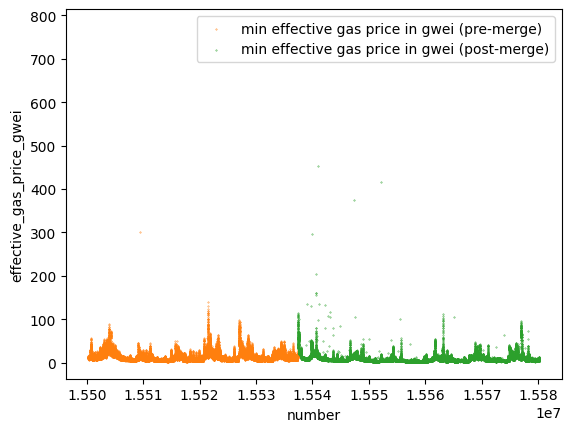

In [210]:
# plot the effective gas price minimum effective gas price
ax = qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number)].plot(x='number', y='effective_gas_price_gwei', kind='scatter', color='C1', s=0.1, label='min effective gas price in gwei (pre-merge)')
qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number)].plot(x='number', y='effective_gas_price_gwei', kind='scatter', color='C2', s=0.1, label='min effective gas price in gwei (post-merge)', ax=ax)

In [140]:
# Know from blocks.ipynb that base fee didn't really change that much.
# Slightly more concentrated toward smaller fees, but need more data

<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

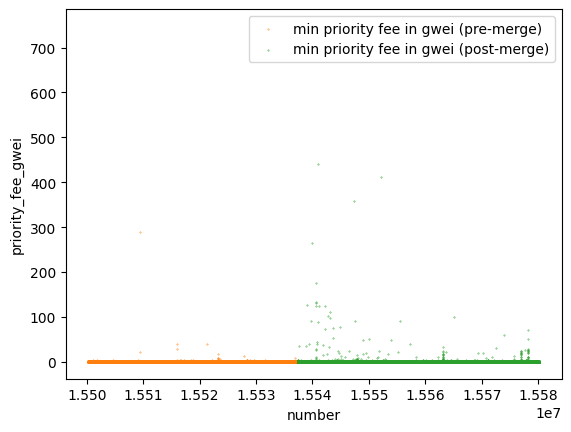

In [211]:
# What does min priority fee look like over time?
ax = qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number)].plot(x='number', y='priority_fee_gwei', kind='scatter', color='C1', s=0.1, label='min priority fee in gwei (pre-merge)')
qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number)].plot(x='number', y='priority_fee_gwei', kind='scatter', color='C2', s=0.1, label='min priority fee in gwei (post-merge)', ax=ax)

<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

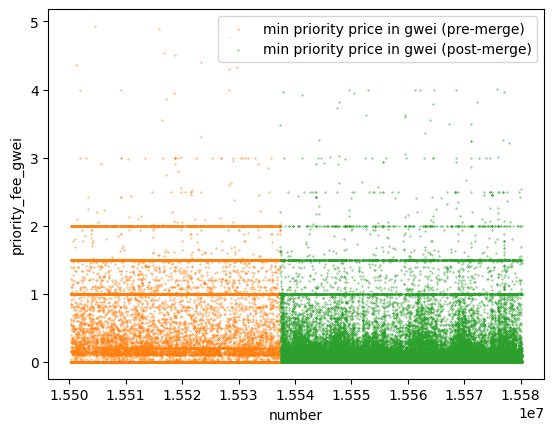

In [212]:
# interestingly, way more extreme "outlier" min priority fees seem to occur *post-merge* (TODO: distr)
# filter out extremes to see bulk
#  ... Interesting. Looks like more fee cluster clustering closer to zero *post-merge* (paying less i'd assume)
#  ... Appear to have priority fee level bands around 1, 1.5, 2 gwei (any reason? or just Schelling-esque?)

min_priority_fee_filter_cap = 5  # TODO: get value from ecdf quantiles to use
ax = qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap)].plot(x='number', y='priority_fee_gwei', kind='scatter', color='C1', s=0.1, label='min priority price in gwei (pre-merge)')
qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap)].plot(x='number', y='priority_fee_gwei', kind='scatter', color='C2', s=0.1, label='min priority price in gwei (post-merge)', ax=ax)

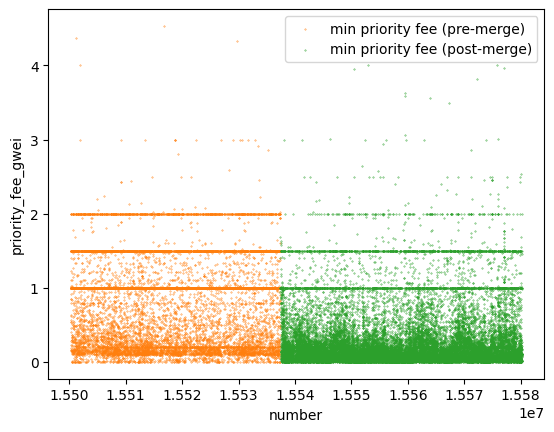

In [269]:
%%capture --no-display
# filter out min PF = 0 MEV txs (Q: why are these MEV?)
min_priority_fee_filter_floor = 0  # TODO: get value from ecdf quantiles to use
ax = qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < min_priority_fee_filter_cap) & (qt_group_by_block_mins["priority_fee_gwei"] > min_priority_fee_filter_floor)].plot(x='number', y='priority_fee_gwei', kind='scatter', color='C1', s=0.1, label='min priority fee (pre-merge)')
qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < min_priority_fee_filter_cap) & (qt_group_by_block_mins["priority_fee_gwei"] > min_priority_fee_filter_floor)].plot(x='number', y='priority_fee_gwei', kind='scatter', color='C2', s=0.1, label='min priority fee (post-merge)', ax=ax)

fig = ax.get_figure()
fig.savefig('./assets/transactions/min_priority_fee.png')

In [215]:
# there are *WAY MORE* min priority fee == 0 blocks than I'd have guessed.
#  ... about 28.5% of pre + post-merge blocks have zero min priority fee
print('min pf = 0 blocks:', qt_group_by_block_mins[(qt_group_by_block_mins["priority_fee_gwei"] == 0)]['priority_fee_gwei'].count())
print('min pf = 0 blocks (%):', qt_group_by_block_mins[(qt_group_by_block_mins["priority_fee_gwei"] == 0)]['priority_fee_gwei'].count() / qt_group_by_block_mins['priority_fee_gwei'].count())

min pf = 0 blocks: 22271
min pf = 0 blocks (%): 0.28494114636642787


In [216]:
# min priority fee == 0 blocks
#  ... pre-merge
#  ... wow, 44% of pre-merge blocks had min PF == 0. Is that right? Why?
print('min pf = 0 blocks (pre-merge):', qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] == 0)]['priority_fee_gwei'].count())
print('min pf = 0 blocks (%; pre-merge):', qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] == 0)]['priority_fee_gwei'].count() / qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number)]['priority_fee_gwei'].count())

min pf = 0 blocks (pre-merge): 15866
min pf = 0 blocks (%; pre-merge): 0.4441520631543587


In [217]:
# min priority fee == 0 blocks
#  ... post-merge
#  ... only 15% of post-merge blocks had min PF == 0. Significantly reduced. 
print('min pf = 0 blocks (post-merge):', qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] == 0)]['priority_fee_gwei'].count())
print('min pf = 0 blocks (%; post-merge):', qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] == 0)]['priority_fee_gwei'].count() / qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number)]['priority_fee_gwei'].count())

min pf = 0 blocks (post-merge): 6405
min pf = 0 blocks (%; post-merge): 0.15092605683585467


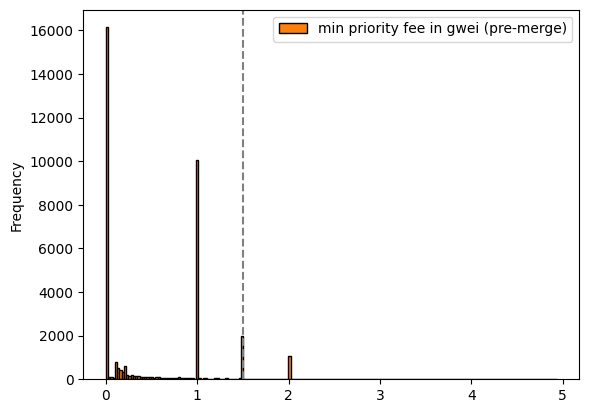

In [289]:
# what's the distribution of min priority fees look like pre v.s. post-merge
#  ... pre-merge, including 0 PF blocks but with cap for bulk (so easier to view)
#  ... very clearly have "round" numbers used most of the time for min PF values [0, 1, 1.5, 2] ("Schelling"?)
ax = qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap)].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C1', edgecolor='k', label='min priority fee in gwei (pre-merge)')
ax.axvline(1.5, color='grey', linestyle='--')

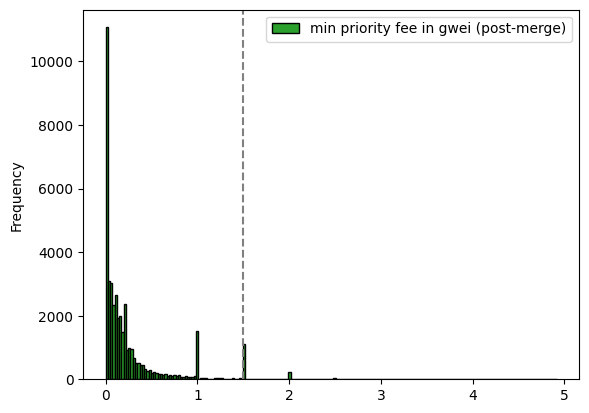

In [290]:
# what's the distribution of min priority fees look like pre v.s. post-merge
#  ... post-merge, including 0 PF blocks but with cap for bulk (so easier to view)
#  ... have *far* more of an exponential distribution post-merge
#  ... still have larger than expected values around [1, 1.5, 2], but reduced significantly vs pre-merge. 0 still large
ax = qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap)].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C2', edgecolor='k', label='min priority fee in gwei (post-merge)')
ax.axvline(1.5, color='grey', linestyle='--')

<AxesSubplot: ylabel='Frequency'>

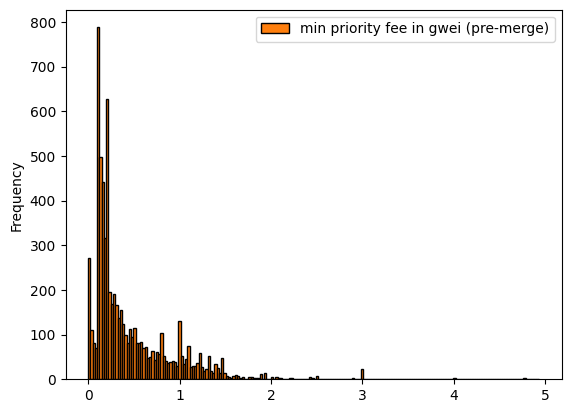

In [291]:
# ignore the min PF == 0 and "Schelling" ([0, 1, 1.5, 2]) values ...
#  ... pre-merge
qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C1', edgecolor='k', label='min priority fee in gwei (pre-merge)')

<AxesSubplot: ylabel='Frequency'>

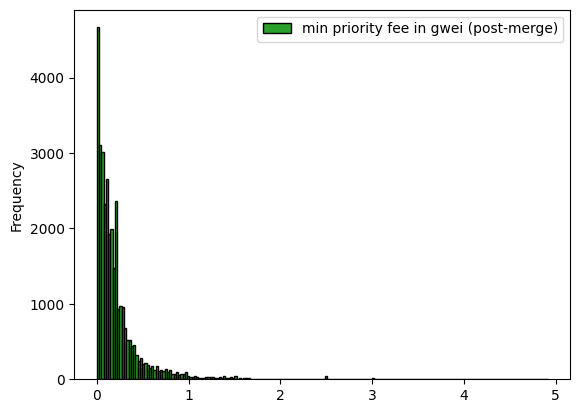

In [292]:
# ignore the min PF == 0 and "Schelling" ([0, 1, 1.5, 2]) values ...
#  ... post-merge
#  ... looks beautifully exponential post-merge
qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].plot(y='priority_fee_gwei', kind='hist', bins=200, color='C2', edgecolor='k', label='min priority fee in gwei (post-merge)')

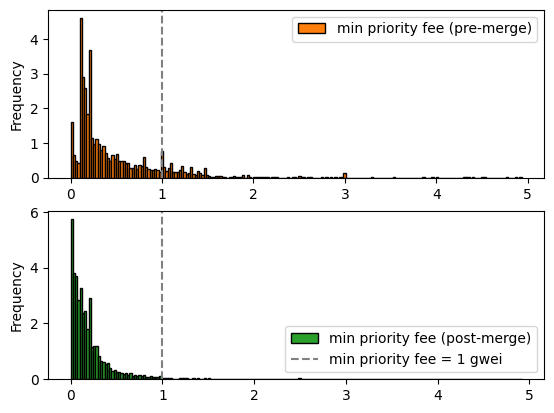

In [293]:
# subplots to make the image more impactful (side by side)
fig, ax = plt.subplots(2, 1)

# pre
qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].plot(y='priority_fee_gwei', kind='hist', density=True, bins=200, color='C1', edgecolor='k', label='min priority fee (pre-merge)', ax=ax[0])
ax[0].axvline(1, color='grey', linestyle='--', label='min priority fee = 1 gwei')

# post
qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].plot(y='priority_fee_gwei', kind='hist', density=True, bins=200, color='C2', edgecolor='k', label='min priority fee (post-merge)', ax=ax[1])
ax[1].axvline(1, color='grey', linestyle='--', label='min priority fee = 1 gwei')
ax[1].legend(loc='lower right')

fig.savefig('./assets/transactions/min_priority_fee_pdf.png')

In [294]:
%%capture
# Fit priority gas fee to exponential and check params near same
#  ... pre merge
x = qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap)]
params = stats.expon.fit(x["priority_fee_gwei"])

params (exponential): (0.0, 0.5068527878412357)


<AxesSubplot: ylabel='Frequency'>

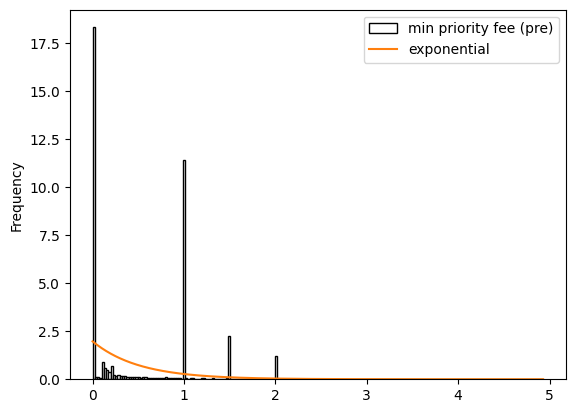

In [295]:
# fit min PF to exponential distribution pre vs post-merge
#  ... pre-merge
y = np.arange(x["priority_fee_gwei"].min(), x["priority_fee_gwei"].max(), 0.01)

ax = x.plot(y='priority_fee_gwei', kind='hist', bins=200, color='w', edgecolor='black', density=True, label='min priority fee (pre)')
print(f'params (exponential):', params)

arg = params[:-2]
pdf = stats.expon.pdf(y, *arg, loc=params[-2], scale=params[-1])
df_pdf = pd.DataFrame(data={'exponential': pdf}, index=y)
df_pdf.plot(ax=ax, color='C1')

In [296]:
%%capture
# Fit priority gas fee to exponential and check params near same
#  ... pre merge without "Schellings"
x = qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))]
params = stats.expon.fit(x["priority_fee_gwei"])

params (exponential): (1e-09, 0.45692310303566785)


<AxesSubplot: ylabel='Frequency'>

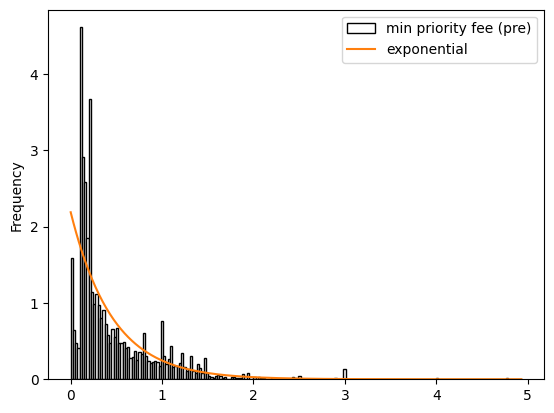

In [297]:
# fit min PF to exponential distribution pre vs post-merge
#  ... pre-merge without "Schellings"
#  ... NOTE: fit params pretty close between with and without "Schellings" for pre-merge,
#  ... NOTE: but not great fit in general
#  ... TODO: goodness of fit metrics
y = np.arange(x["priority_fee_gwei"].min(), x["priority_fee_gwei"].max(), 0.01)

ax = x.plot(y='priority_fee_gwei', kind='hist', bins=200, color='w', edgecolor='black', density=True, label='min priority fee (pre)')
print(f'params (exponential):', params)

arg = params[:-2]
pdf = stats.expon.pdf(y, *arg, loc=params[-2], scale=params[-1])
df_pdf = pd.DataFrame(data={'exponential': pdf}, index=y)
df_pdf.plot(ax=ax, color='C1')

In [298]:
%%capture
# Fit priority gas fee to exponential and check params near same
#  ... post merge
x = qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap)]
params = stats.expon.fit(x["priority_fee_gwei"])

params (exponential): (0.0, 0.25319632016944865)


<AxesSubplot: ylabel='Frequency'>

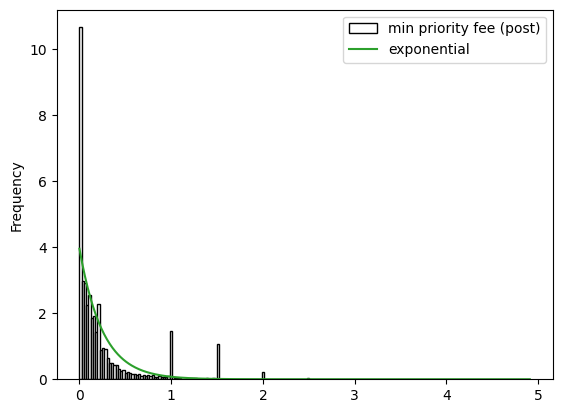

In [299]:
# fit min PF to exponential distribution pre vs post-merge
#  ... post-merge
#  ... NOTE: post-merge scale param for expon fit is 1/2 what it was pre-merge
#  ... NOTE: suggesting greater concentration around smaller min priority fees for txs to be included
#  ... NOTE: i.e. min fee cost for users to get their tx included in a block is less post-merge
#  ... TODO: how much were people overpaying pre v.s. post-merge? best way to compare?
y = np.arange(x["priority_fee_gwei"].min(), x["priority_fee_gwei"].max(), 0.01)

ax = x.plot(y='priority_fee_gwei', kind='hist', bins=200, color='w', edgecolor='black', density=True, label='min priority fee (post)')
print(f'params (exponential):', params)

arg = params[:-2]
pdf = stats.expon.pdf(y, *arg, loc=params[-2], scale=params[-1])
df_pdf = pd.DataFrame(data={'exponential': pdf}, index=y)
df_pdf.plot(ax=ax, color='C2')

In [300]:
%%capture
# Fit priority gas fee to exponential and check params near same
#  ... post merge without "Schellings"
x = qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))]
params = stats.expon.fit(x["priority_fee_gwei"])

params (exponential): (1e-09, 0.21773822388116)


<AxesSubplot: ylabel='Frequency'>

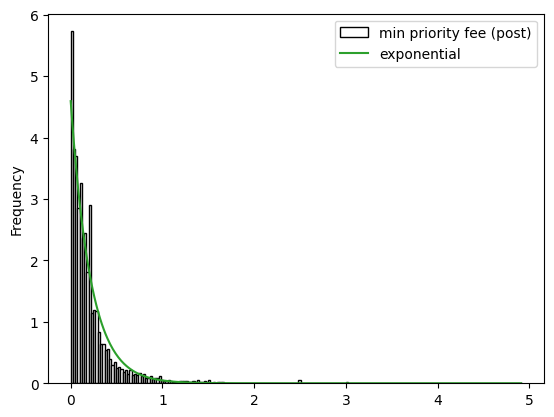

In [301]:
# fit min PF to exponential distribution pre vs post-merge
#  ... post-merge without Schellings
#  ... NOTE: wow, that's a WAY better fit than pre-merge just from eyeballing
#  ... NOTE: down to 0.22 scale factor for expon fit (pre-merge fit around 0.45 without Schellings)
#  ... NOTE: so in both cases a factor of 2 steeper expon distribution post-merge
#  ... NOTE: since stdev[expon] = 1/scale, translates to post-merge reduction in standard dev of 50%
y = np.arange(x["priority_fee_gwei"].min(), x["priority_fee_gwei"].max(), 0.01)

ax = x.plot(y='priority_fee_gwei', kind='hist', bins=200, color='w', edgecolor='black', density=True, label='min priority fee (post)')
print(f'params (exponential):', params)

arg = params[:-2]
pdf = stats.expon.pdf(y, *arg, loc=params[-2], scale=params[-1])
df_pdf = pd.DataFrame(data={'exponential': pdf}, index=y)
df_pdf.plot(ax=ax, color='C2')

In [302]:
# pre merge with filter stats
qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].describe()

,gas_limit,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,max_fee_less_base_gwei,priority_fee_gwei,effective_gas_price_gwei,number
count,6.925000e+03,6925.000000,6.925000e+03,6.925000e+03,6925.000000,6925.000000,6.925000e+03,6925.000000,6.925000e+03
mean,2.597571e+04,0.429978,7.971235e-01,1.662951e+09,12.952245,-12.522267,4.569231e-01,13.409168,1.551847e+07
std,3.607871e+05,6.946281,5.896852e-01,1.522377e+05,10.044695,11.677035,4.899844e-01,10.116977,1.063442e+04
min,2.100000e+04,0.000000,1.000000e-09,1.662691e+09,2.741532,-112.952316,1.000000e-09,3.064766,1.550029e+07
25%,2.100000e+04,0.000000,4.278633e-01,1.662820e+09,6.525909,-15.645468,1.439253e-01,6.978703,1.550928e+07
50%,2.100000e+04,0.000000,9.259858e-01,1.662946e+09,9.814458,-9.644367,2.545200e-01,10.208639,1.551810e+07
75%,2.100000e+04,0.000000,1.000000e+00,1.663083e+09,16.002841,-6.327914,6.271371e-01,16.490663,1.552766e+07
max,2.999152e+07,500.000000,2.868231e+01,1.663224e+09,112.952316,480.802156,4.933982e+00,114.180159,1.553739e+07


In [303]:
# post merge with filter stats
qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].describe()

,gas_limit,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,max_fee_less_base_gwei,priority_fee_gwei,effective_gas_price_gwei,number
count,3.313700e+04,33137.000000,3.313700e+04,3.313700e+04,33137.000000,33137.000000,3.313700e+04,33137.000000,3.313700e+04
mean,2.201755e+04,0.112567,3.642596e-01,1.663478e+09,8.602675,-8.490108,2.177382e-01,8.820414,1.555829e+07
std,1.564960e+05,1.844481,4.133817e-01,1.480911e+05,7.799234,7.734492,3.044845e-01,7.879926,1.220890e+04
min,2.100000e+04,0.000000,1.000000e-09,1.663224e+09,1.706518,-112.434116,1.000000e-09,2.000000,1.553740e+07
25%,2.100000e+04,0.000000,1.420639e-01,1.663350e+09,4.254416,-10.258817,5.218433e-02,4.401913,1.554776e+07
50%,2.100000e+04,0.000000,2.212565e-01,1.663475e+09,6.248051,-6.190181,1.324563e-01,6.487420,1.555804e+07
75%,2.100000e+04,0.000000,4.318093e-01,1.663603e+09,10.317346,-4.212924,2.542363e-01,10.576507,1.556863e+07
max,2.850000e+07,98.274552,2.264004e+01,1.663744e+09,112.434116,14.334440,4.915974e+00,114.059425,1.558018e+07


In [306]:
print("diff in means pre vs post merge:", qt_group_by_block_mins[(qt_group_by_block_mins["number"] < merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].describe()['priority_fee_gwei']['mean'] - qt_group_by_block_mins[(qt_group_by_block_mins["number"] >= merge_block_number) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (qt_group_by_block_mins["priority_fee_gwei"] < min_priority_fee_filter_cap) & (~qt_group_by_block_mins["priority_fee_gwei"].isin([0, 1, 1.5, 2]))].describe()['priority_fee_gwei']['mean'])

diff in means pre vs post merge: 0.2391848791545079
